In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("Datos_limpios_Cambridge.csv")

In [4]:
df = df[['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count',
         'accommodates', 'reviews_per_month', 'price']]
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df = df.dropna()

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/gr/2gryslc15c5d32n83x_15llh0000gn/T/ipykernel_9125/1699830379.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [5]:
def func_cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

def func_logaritmica(x, a, b):
    return a * np.log(x) + b

0.3200312673810459
0.5657130609956305


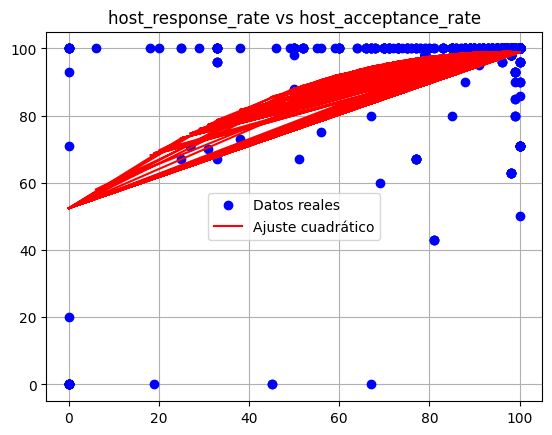

In [26]:
x = df['host_acceptance_rate']
y = df['host_response_rate']
popt, _ = curve_fit(func_cuadratica, x, y)
y_pred = func_cuadratica(x, *popt)
r2_1 = r2_score(y, y_pred)
print(r2_1)
r_1 = np.sqrt(r2_1)
print(r_1)
plt.plot(x, y, 'bo', label='Datos reales')
plt.plot(x, y_pred, 'r-', label='Ajuste cuadrático')
plt.title('host_response_rate vs host_acceptance_rate')
plt.legend()
plt.grid()
plt.show()

0.08490592006092545
0.29138620430783174


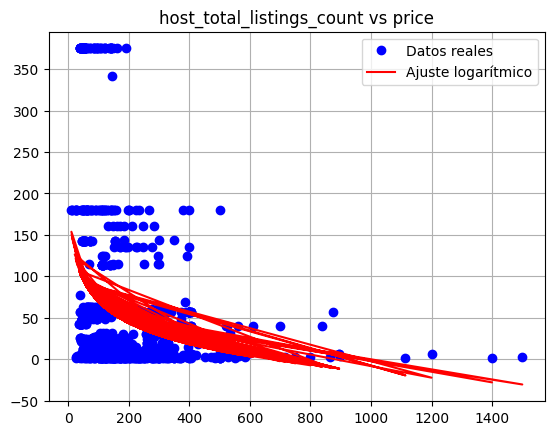

In [25]:
x = df['price']
y = df['host_total_listings_count']
x = x[x > 0]
y = y.loc[x.index]
popt, _ = curve_fit(func_logaritmica, x, y)
y_pred = func_logaritmica(x, *popt)
r2_2 = r2_score(y, y_pred)
print(r2_2)
r_2 = np.sqrt(r2_2)
print(r_2)
plt.plot(x, y, 'bo', label='Datos reales')
plt.plot(x, y_pred, 'r-', label='Ajuste logarítmico')
plt.title('host_total_listings_count vs price')
plt.legend()
plt.grid()
plt.show()

0.013312579124250656
0.11538015047767383


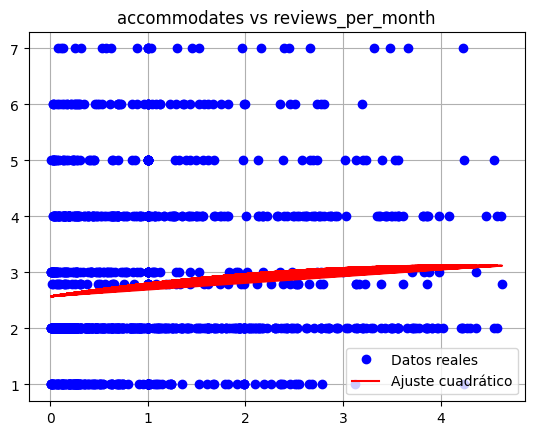

In [24]:
x = df['reviews_per_month']
y = df['accommodates']
popt, _ = curve_fit(func_cuadratica, x, y)
y_pred = func_cuadratica(x, *popt)
r2_3 = r2_score(y, y_pred)
print(r2_3)
r_3 = np.sqrt(r2_3)
print(r_3)
plt.plot(x, y, 'bo', label='Datos reales')
plt.plot(x, y_pred, 'r-', label='Ajuste cuadrático')
plt.title('accommodates vs reviews_per_month')
plt.legend()
plt.grid()
plt.show()

0.00016372253270668935
0.012795410611101518


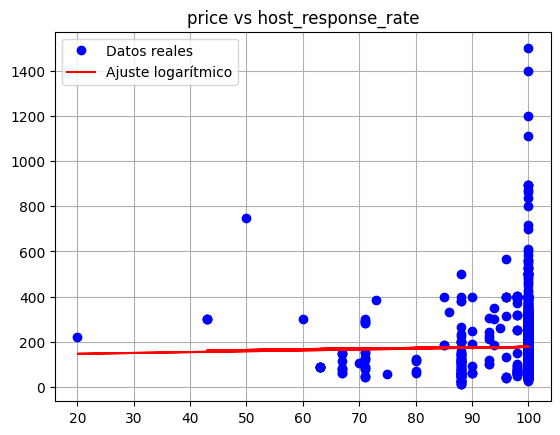

In [27]:
x = df['host_response_rate']
y = df['price']
x = x[x > 0]
y = y.loc[x.index]
popt, _ = curve_fit(func_logaritmica, x, y)
y_pred = func_logaritmica(x, *popt)
r2_4 = r2_score(y, y_pred)
print(r2_4)
r_4 = np.sqrt(r2_4)
print(r_4)
plt.plot(x, y, 'bo', label='Datos reales')
plt.plot(x, y_pred, 'r-', label='Ajuste logarítmico')
plt.title('price vs host_response_rate')
plt.legend()
plt.grid()
plt.show()

0.015879846595964975
0.1260152633452193


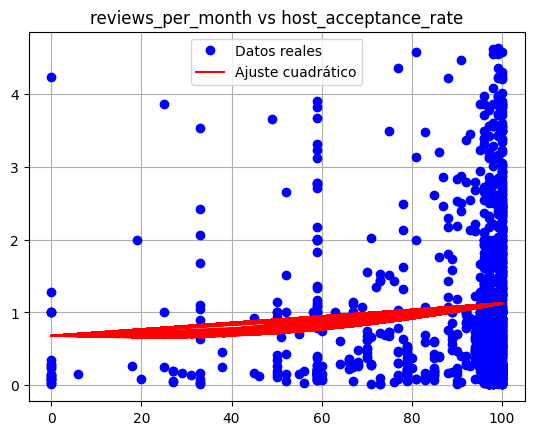

In [32]:
x = df['host_acceptance_rate']
y = df['reviews_per_month']
popt, _ = curve_fit(func_cuadratica, x, y)
y_pred = func_cuadratica(x, *popt)
r2_5 = r2_score(y, y_pred)
print(r2_5)
r_5 = np.sqrt(r2_5)
print(r_5)
plt.plot(x, y, 'bo', label='Datos reales')
plt.plot(x, y_pred, 'r-', label='Ajuste cuadrático')
plt.title('reviews_per_month vs host_acceptance_rate')
plt.legend()
plt.grid()
plt.show()

0.00014004316189863975
0.011833983348756232


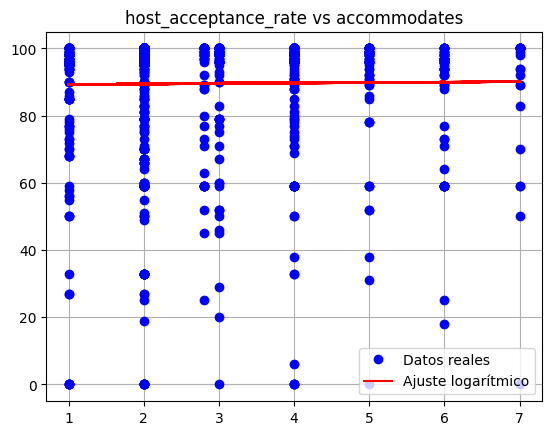

In [30]:
x = df['accommodates']
y = df['host_acceptance_rate']
x = x[x > 0]
y = y.loc[x.index]
popt, _ = curve_fit(func_logaritmica, x, y)
y_pred = func_logaritmica(x, *popt)
r2_6 = r2_score(y, y_pred)
print(r2_6)
r_6 = np.sqrt(r2_6)
print(r_6)
plt.plot(x, y, 'bo', label='Datos reales')
plt.plot(x, y_pred, 'r-', label='Ajuste logarítmico')
plt.title('host_acceptance_rate vs accommodates')
plt.legend()
plt.grid()
plt.show()

In [31]:
tabla_final = pd.DataFrame({
    'Variable Objetivo': [
        'host_response_rate', 'host_total_listings_count', 'accommodates',
        'price', 'reviews_per_month', 'host_acceptance_rate'
    ],
    'Variable Independiente': [
        'host_acceptance_rate', 'price', 'reviews_per_month',
        'host_response_rate', 'host_acceptance_rate', 'accommodates'
    ],
    'Modelo': [
        'Función Cuadrática', 'Función Logarítmica', 'Función Cuadrática',
        'Función Logarítmica', 'Función Cuadrática', 'Función Logarítmica'
    ],
    'R^2': [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6],
    'r': [r_1, r_2, r_3, r_4, r_5, r_6]
})
tabla_final

,Variable Objetivo,Variable Independiente,Modelo,R^2,r
0,host_response_rate,host_acceptance_rate,Función Cuadrática,0.320031,0.565713
1,host_total_listings_count,price,Función Logarítmica,0.084906,0.291386
2,accommodates,reviews_per_month,Función Cuadrática,0.013313,0.115380
3,price,host_response_rate,Función Logarítmica,0.000164,0.012795
4,reviews_per_month,host_acceptance_rate,Función Cuadrática,0.015880,0.126015
5,host_acceptance_rate,accommodates,Función Logarítmica,0.000140,0.011834
